## Support Vector Regression

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

**Importing Dataset**

In [2]:
dataset = pd.read_csv('C:/Users/okiem/OneDrive/Desktop/Data Science Projects/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #creating matrix of feature, by taking all rows and all columns expcept last(-1)
y = dataset.iloc[:, -1].values  #creating dependent variable vector

In [3]:
#Transform y in 2D array for transformation
y = y.reshape(len(y),1)

**Splitting Dataset into Train and Test Sets**

Due to small size of dataset, not splitting of data is necessary, we are only trying to get a particular vlue based on the data

**Feature Scaling** - No coefficients within equation, therefore, feature scaling is necessary. Implicit relationship between X and Y

In [4]:
# The dependent and independent variables both need to have feature scaling applied when the variables are both numerical and 
# very much different(in this case, much higher)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X) #once you fit the scaler to the X data, the mean and SD are calculated and stay with that scaler
y = sc_y.fit_transform(y) #must create a second scaler for the dependent variable transformation

**Training the SVR model on whole dataset**

In [5]:
regressor = SVR(kernel='rbf') #you have to input parameter! Must choose a kernal. 
regressor.fit(X,y) # this will be transformed into scale of y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Predicting the SVR results**

In [6]:
# Prediction needs to be on SAME SCALE that the feature column was scaled too, therefore, use same scaler to transform predicted
# value. 
# ALSO, must reverse scale y back to original matrix values. 
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) 

array([170370.0204065])

**Visulize SVR results**

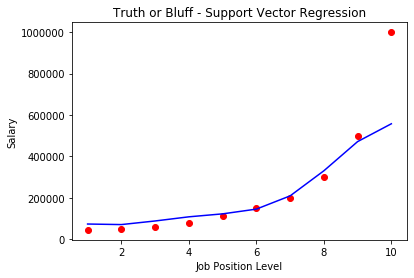

In [21]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff - Support Vector Regression')
plt.xlabel('Job Position Level')
plt.ylabel('Salary')
plt.show()

Graph with higher resolution curver

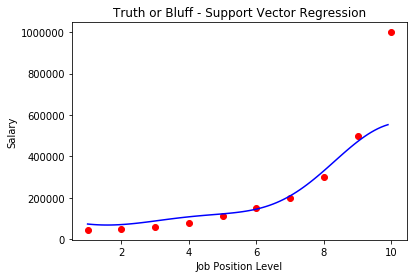

In [23]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title('Truth or Bluff - Support Vector Regression')
plt.xlabel('Job Position Level')
plt.ylabel('Salary')
plt.show()

**NOTE: SVR does NOT catch outliers properly, clearly shown in the prediction graph**